In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['mobile']
area_list = [str(i) for i in range(81)]

In [20]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'od_from_mobile/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df = df.iloc[:, 1:]
            csv_array[_dir][_seed][_csv] = df 

In [21]:
def create_next_move_area(df, area):
    area = float(area)
    df_area = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_area['area'] = [float(i) for i in range(81)]
    
    for row in df.values.tolist():
        if area in row:
            index = row.index(area)
            if (len(row) > index+1) and (not np.isnan(row[index+1])):
                df_area.loc[df_area['area'] == row[index+1], 'people'] += 1
                    
    return df_area

In [22]:
# move_array = {}
# for _dir in dir_list:
#     move_array[_dir] = {}
#     for _seed in seed_list:
#         move_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             move_array[_dir][_seed][_csv] = {}
#             df = csv_array[_dir][_seed][_csv].copy()
            
#             for _area in area_list:
#                 df_area = create_next_move_area(df, _area)
# #                 df_area.to_csv(root_dir + 'next_move_area_od_from_mobile/' + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv', index=False)
#                 move_array[_dir][_seed][_csv][_area] = df_area
#             print(_dir + 'seed' + _seed + '_' + _csv)

In [25]:
def create_2d(df):
    df_base = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_base['area'] = [i for i in range(81)]

    for row in df.values.tolist():
        row = [x for x in row if not np.isnan(x)]
        for r in row:
            df_base.loc[r, 'people'] += 1
            
    return df_base

In [27]:
csv_array_2d = {}
for _dir in dir_list:
    csv_array_2d[_dir] = {}
    for _seed in seed_list:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            df = csv_array[_dir][_seed][_csv].copy()
            df = create_2d(df)
            csv_array_2d[_dir][_seed][_csv] = df
#             df.to_csv(root_dir + 'od_from_mobile_2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv', index=False)

In [31]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'od_from_mobile_2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                            index_col=0)
            
            df_new = pd.DataFrame()
            for i in range(9):
                tmp = df.loc[i*9:i*9+8, 'people']
                tmp.reset_index(drop=True, inplace=True)
                df_new = pd.concat([df_new, tmp], axis=1)
            
            df_new = df_new.T
            df_new.columns=(['{0:02d}'.format(i*10) for i in range(9)])
            df_new.index=([str(i) for i in range(9)])
#             df_new = df_new.sort_index(ascending=False)
            df = df_new
            print(_dir, _seed)
            print(df.sum().sum())
#             df.to_csv(root_dir + 'od_from_mobile_3D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv', index=False)

people10000 123
8173.0
people10000 124
7964.0
people10000 125
7958.0
people20000 123
17013.0
people20000 124
17260.0
people20000 125
16869.0
people30000 123
24856.0
people30000 124
26558.0
people30000 125
26006.0


In [32]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'od_from_mobile_3D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            csv_array[_dir][_seed][_csv] = df

In [34]:
people = 'people30000'
seed = '123'
csv = 'mobile'
df = csv_array[people][seed][csv].copy()
df = df.sort_index(ascending=False)
df

,00,10,20,30,40,50,60,70,80
8,0.0,0.0,0.0,4.0,111.0,11.0,4.0,10.0,0.0
7,0.0,0.0,39.0,48.0,203.0,77.0,132.0,5.0,0.0
6,0.0,5.0,18.0,122.0,1149.0,286.0,81.0,0.0,0.0
5,0.0,9.0,43.0,242.0,7063.0,3940.0,0.0,0.0,0.0
4,7.0,15.0,112.0,125.0,4069.0,4171.0,125.0,44.0,0.0
3,1.0,21.0,81.0,686.0,843.0,140.0,33.0,16.0,0.0
2,82.0,249.0,78.0,225.0,10.0,0.0,0.0,1.0,0.0
1,0.0,12.0,84.0,24.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
import seaborn as sns
def create_contour(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

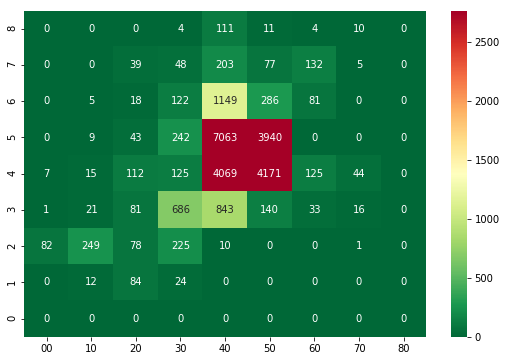

In [42]:
create_contour(df)